# Medical Imaging
## 2021-2022

### Lab 2
João Félix Pimenta | Maja Milekic | Miguel Joaquim Roque Fernandes 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon

### 1. Generate the modified Shepp-Logan phantom using shepp_logan_phantom. Use the function rescale to get a 256x256 dimension.

scale factor = final size / initial size = 256/400 = 0.64

Initial image shape:  (400, 400)
Final image shape:  (256, 256)


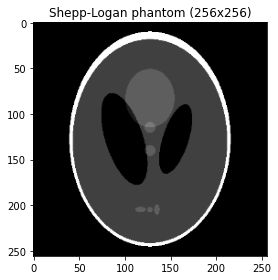

In [3]:
image = shepp_logan_phantom()
print("Initial image shape: ", image.shape)
image = rescale(image, scale=0.64)
print("Final image shape: ", image.shape)


plt.figure()
plt.title("Shepp-Logan phantom (256x256)")
plt.imshow(image, cmap=plt.cm.Greys_r)


plt.tight_layout()
plt.show()

### 2. Simulate the sinogram obtained by collecting projections covering [0;180[º in steps of 1º (using radon).

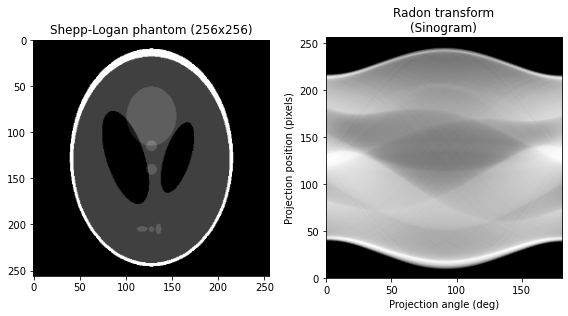

In [4]:
theta = np.linspace(0., 180., 180, endpoint=False) #3rd position in linspace -> step (in this case, 180 points between
                                                   #0 and 180 => step of 1 degree)
sinogram = radon(image, theta=theta)   #apply the Radon Transform to obtain the sinogram from the object function

# Plot the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
ax1.set_title("Shepp-Logan phantom (256x256)")
ax1.imshow(image, cmap=plt.cm.Greys_r)

dx, dy = 0.5 * 180.0 / 180, 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")    #angle in the x-axis
ax2.set_ylabel("Projection position (pixels)") #projection position (x') in the y-axis
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

### 3. Simulate the associated reconstructed image using filtered backprojection (using iradon).

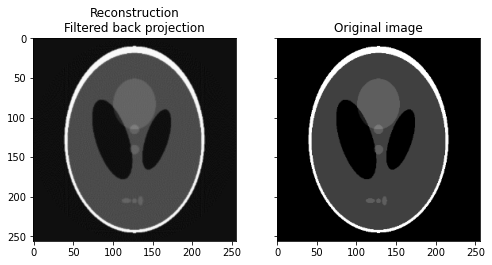

In [5]:
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')  #apply the Inverse Radon Transform to obtain the 
                                                                        #reconstructed image from the sinogram (using a 
                                                                        #filter - Filtered Backprojection)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Original image")
ax2.imshow(image, cmap=plt.cm.Greys_r)
plt.show()

Reconstructed image is similar to the original. It is a bit more blurred, but it would be much worse if we did not apply a filter (so, if a simple backprojection was performed)!

### 4. Repeat the simulations in 2. and 3. by covering: [0;60[$^\circ$, [0;90[$^\circ$, [0;120[$^\circ$ and [0;360[$^\circ$, in steps of 1$^\circ$

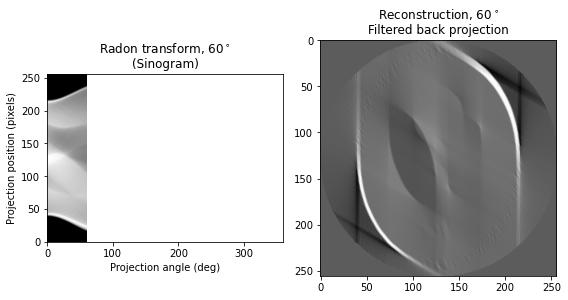

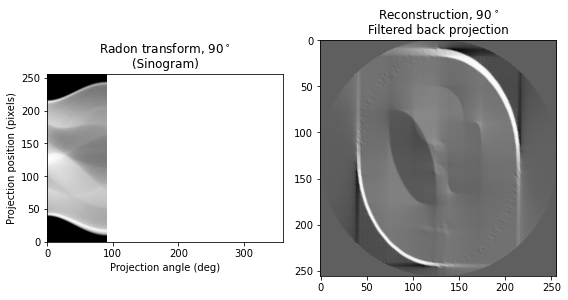

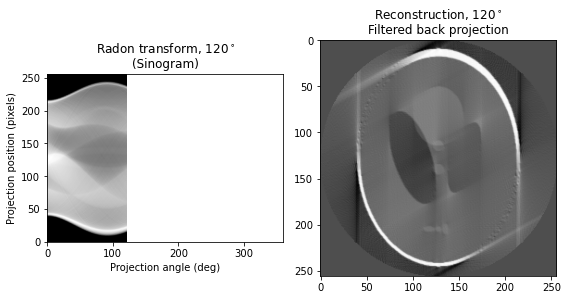

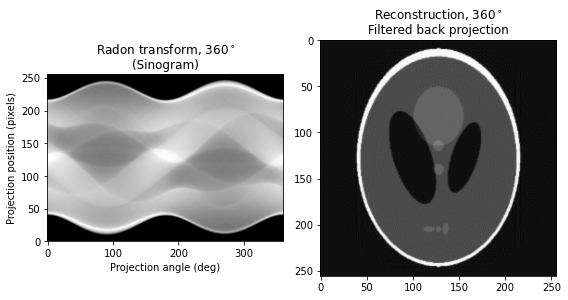

In [6]:
#Obtain the sinogram for each situation. Then, from the sinogram, perform filtered backprojection (apply Inverse Radon
#Transform) to obtain reconstructed image.

# 60 degrees
theta_60 = np.linspace(0., 60., 60, endpoint=False)
sinogram_60 = radon(image, theta=theta_60)

reconstruction_60 = iradon(sinogram_60, theta=theta_60, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 60.0 / 60, 0.5 / sinogram_60.shape[0]
ax1.set_title("Radon transform, 60$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_60, cmap=plt.cm.Greys_r,
           extent=(-dx, 60.0 + dx, -dy, sinogram_60.shape[0] + dy),
           )
ax1.set_xlim(0, 360)

ax2.set_title("Reconstruction, 60$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_60, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

# 90 degrees
theta_90 = np.linspace(0., 90., 90, endpoint=False)
sinogram_90 = radon(image, theta=theta_90)

reconstruction_90 = iradon(sinogram_90, theta=theta_90, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 90.0 / 90, 0.5 / sinogram_90.shape[0]
ax1.set_title("Radon transform, 90$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_90, cmap=plt.cm.Greys_r,
           extent=(-dx, 90.0 + dx, -dy, sinogram_90.shape[0] + dy),
           )
ax1.set_xlim(0, 360)

ax2.set_title("Reconstruction, 90$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_90, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

# 120 degrees
theta_120 = np.linspace(0., 120., 120, endpoint=False)
sinogram_120 = radon(image, theta=theta_120)

reconstruction_120 = iradon(sinogram_120, theta=theta_120, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 120.0 / 120, 0.5 / sinogram_120.shape[0]
ax1.set_title("Radon transform, 120$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_120, cmap=plt.cm.Greys_r,
           extent=(-dx, 120.0 + dx, -dy, sinogram_120.shape[0] + dy),
          )
ax1.set_xlim(0, 360)

ax2.set_title("Reconstruction, 120$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_120, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

# 360 degrees
theta_360 = np.linspace(0., 360., 360, endpoint=False)
sinogram_360 = radon(image, theta=theta_360)

reconstruction_360 = iradon(sinogram_360, theta=theta_360, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 360.0 / 360, 0.5 / sinogram_360.shape[0]
ax1.set_title("Radon transform, 360$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_360, cmap=plt.cm.Greys_r,
           extent=(-dx, 360.0 + dx, -dy, sinogram_360.shape[0] + dy),
           )

ax2.set_title("Reconstruction, 360$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_360, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

The reconstructed image is increasingly closer to the original one. That is because we have increasing number of projections. Theoretically, it would be enough to scan until 180$^\circ$, but scanning until 360$^\circ$ allows us to get rid of imperfections, such as partial volume effects (we can notice that the 360$^\circ$ image is a bit better than the 180$^\circ$ image).

### 5. Repeat the simulations in 2. and 3. by covering [0;180[$^\circ$, in steps of 0.5$^\circ$, 5$^\circ$ and 10$^\circ$.

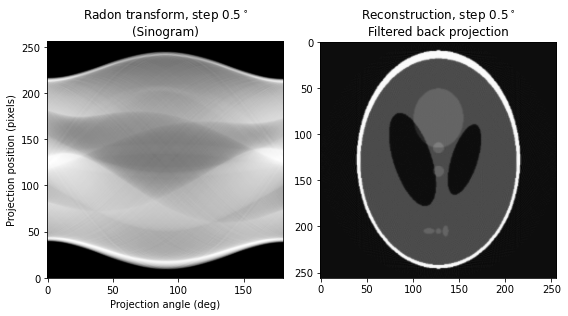

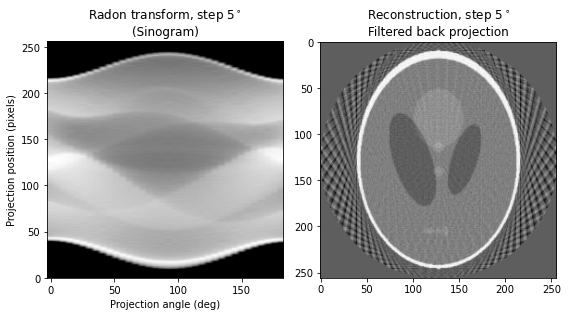

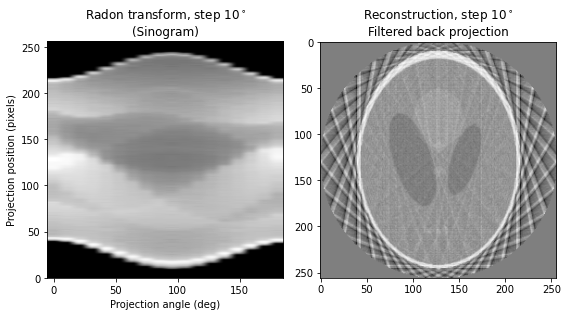

In [7]:
# 180 degrees, step 0.5 degrees
theta_05 = np.linspace(0., 180., 360, endpoint=False) #3rd position in linspace -> step (in this case, 360 points between
                                                      #0 and 180 => step of 0.5 degrees)
sinogram_05 = radon(image, theta=theta_05)

reconstruction_05 = iradon(sinogram_05, theta=theta_05, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 180.0 / 360, 0.5 / sinogram_05.shape[0]
ax1.set_title("Radon transform, step 0.5$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_05, cmap=plt.cm.Greys_r,
           extent=(-dx, 180 + dx, -dy, sinogram_05.shape[0] + dy),
           aspect='auto')

ax2.set_title("Reconstruction, step 0.5$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_05, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

# 180 degrees, step 5 degrees
theta_5 = np.linspace(0., 180., 36, endpoint=False)
sinogram_5 = radon(image, theta=theta_5)

reconstruction_5 = iradon(sinogram_5, theta=theta_5, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 180.0 / 36, 0.5 / sinogram_5.shape[0]
ax1.set_title("Radon transform, step 5$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_5, cmap=plt.cm.Greys_r,
           extent=(-dx, 180 + dx, -dy, sinogram_5.shape[0] + dy),
           aspect='auto')

ax2.set_title("Reconstruction, step 5$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_5, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

# 180 degrees, step 10 degrees
theta_10 = np.linspace(0., 180., 18, endpoint=False)
sinogram_10 = radon(image, theta=theta_10)

reconstruction_10 = iradon(sinogram_10, theta=theta_10, filter_name='ramp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

dx, dy = 0.5 * 180.0 / 18, 0.5 / sinogram_10.shape[0]
ax1.set_title("Radon transform, step 10$^\circ$\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_10, cmap=plt.cm.Greys_r,
           extent=(-dx, 180 + dx, -dy, sinogram_10.shape[0] + dy),
           aspect='auto')

ax2.set_title("Reconstruction, step 10$^\circ$\nFiltered back projection")
ax2.imshow(reconstruction_10, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

Increasing the step (of rotation) leads to low number of projections (undersampling). This causes the appearance of streak artifacts (as we can see for steps of 5$^\circ$ and 10$^\circ$).

### 6. Repeat the simulations in 2. using the original angles, by adding noise to the projection data (using the random.poisson function of the numpy library), considering a maximum number of counts per pixel of 10$^3$ photons.
$\textit{Note}$: as in this case noise follows the Poisson distribution, it depends on the 
signal level, so the output of the noise generation function will already 
correspond to the noisy sinogram. Prior to applying this function, you should 
rescale your sinogram intensities to the [0, 255] interval and convert the images 
to uint8 type (8-bit unsigned integers) to make the noise more noticeable.

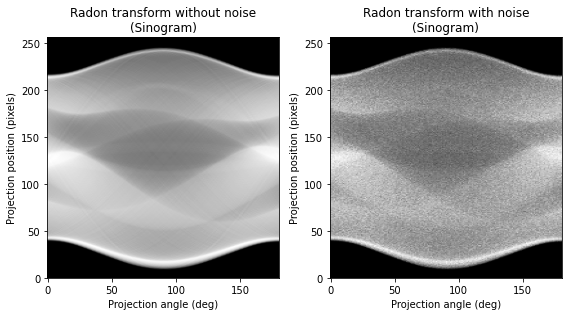

In [8]:
theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(image, theta=theta)
sinogram_min = np.min(sinogram)
sinogram_max = np.max(sinogram)
sinogram_s = (sinogram-sinogram_min)/(sinogram_max-sinogram_min)*255.0  #rescaling the sinogram intensities to [0, 255]
sinogram_s = sinogram_s.astype(np.uint8)

sinogram_n = np.random.poisson(sinogram_s)  #add the Poisson noise to the projection data (original sinogram)
sinogram_n = (sinogram_n-sinogram_min)/(sinogram_max-sinogram_min)*1000.0

dx, dy = 0.5 * 180.0 / 180, 0.5 / sinogram.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Radon transform without noise\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

ax2.set_title("Radon transform with noise\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram_n, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

If we were to do the difference between the two sinograms, the result would be the sinogram containing excluisively the random Poisson noise.


### 7. Now reconstruct the image from the noisy projection data using iradon (with the original ramp, i.e. Ram-Lak, filter). 

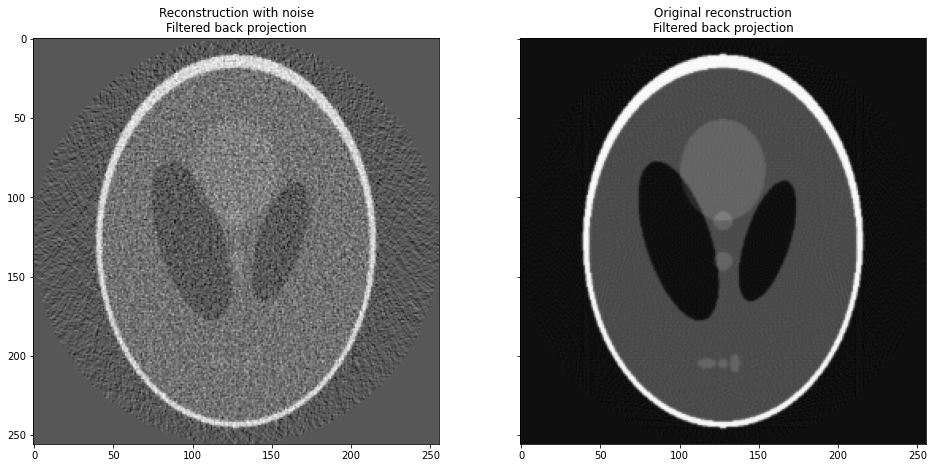

In [9]:
reconstruction_n = iradon(sinogram_n, theta=theta, filter_name='ramp') #apply the Inverse Radon Transform to obtain the 
                                                                       #reconstructed image from the sinogram (using a 
                                                                       #filter - Filtered Backprojection)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction with noise\nFiltered back projection")
ax1.imshow(reconstruction_n, cmap=plt.cm.Greys_r)
ax2.set_title("Original reconstruction\nFiltered back projection")
ax2.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
plt.show()


### 8. Repeat 7, by replacing the original Ram-Lak filter by modified filters (available in iradon), and explain the results as a function of their different frequency responses.

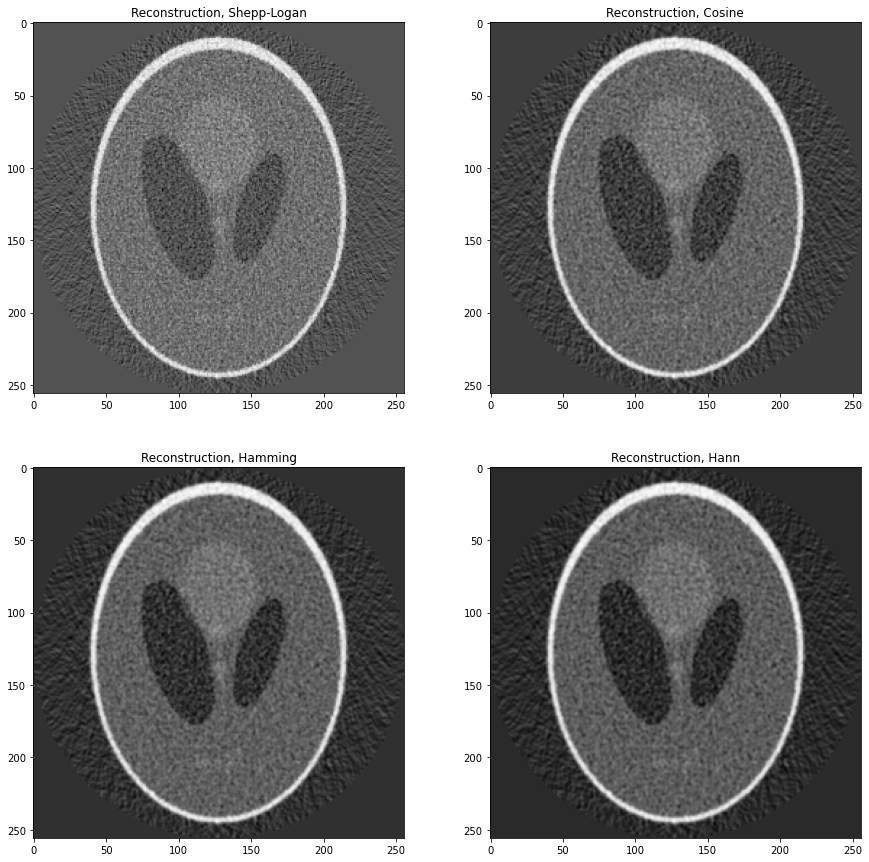

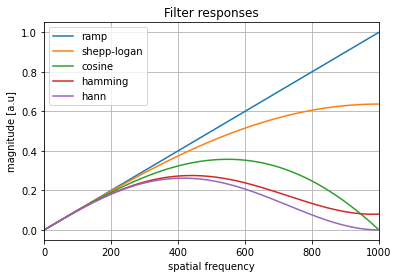

In [10]:
#From the noisy data (sinogram), reconstruct the image by applying the Inverse Radon Transform and using different filters
#than the Ram-Lak -> Shepp-Logan, Cosine, Hamming, Hann.

reconstruction_s = iradon(sinogram_n, theta=theta, filter_name='shepp-logan') #Shepp-Logan filter
reconstruction_c = iradon(sinogram_n, theta=theta, filter_name='cosine')      #Cosine filter
reconstruction_ham = iradon(sinogram_n, theta=theta, filter_name='hamming')   #Hamming filter
reconstruction_han = iradon(sinogram_n, theta=theta, filter_name='hann')      #Hann filter

fig, axes = plt.subplots(
  ncols=2,
  nrows=2,
  figsize=(15, 15))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set_title("Reconstruction, Shepp-Logan")
ax1.imshow(reconstruction_s, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction, Cosine")
ax2.imshow(reconstruction_c, cmap=plt.cm.Greys_r)
ax3.set_title("Reconstruction, Hamming")
ax3.imshow(reconstruction_ham, cmap=plt.cm.Greys_r)
ax4.set_title("Reconstruction, Hann")
ax4.imshow(reconstruction_han, cmap=plt.cm.Greys_r)
plt.show()


# Frequency responses of filters
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('spatial frequency')
plt.ylabel('magnitude [a.u]')
plt.title('Filter responses')
plt.legend()
plt.grid()
plt.show()

Ramp and Shepp-Logan are high-pass filters, so they leave the details intact, but also the noise. On the other hand, Cosine, Hamming and Hann are band-pass filters, which filter the high-frequency noise, resulting in a more blurred image. It is important to note that Hamming response does not filter out completely the signal at the frequency of 1000, while Hann and cosine do.

Another interesting aspect: Ramp and Shepp-Logan yield brighter images than the other three filters. That can be explained by looking at their frequency responses, which have higher magnitudes. So, all the pixels are multiplied by higher value (magnitude) than with other filters. For instance, Cosine filter's image is slightly darker, but Hamming and Hann's are definitely the darkest, due to their filter responses of lower magnitudes.